In [1]:
import pandas as pd
import sqlite3
import emoji
from collections import Counter
from pprint import pprint

from matplotlib.pyplot import yscale, xscale, title, plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def read_sql():
    df = __read_sql()
    df = __select_taipei_area(df)
    df = __clean_raw_dataframe(df)
    return df

# read raw data from sql
def __read_sql():
    con = sqlite3.connect('../data/InstagramPost.sqlite')
    con2 = sqlite3.connect('../data/InstagramPost2.sqlite')
    con3 = sqlite3.connect('../data/InstagramPost3.sqlite')
    SQL = pd.read_sql_query('select * from InstagramPost', con)
    SQL2 = pd.read_sql_query('select * from InstagramPost_table2', con)
    SQL3 = pd.read_sql_query('select * from InstagramPost_table3', con)
    SQL4 = pd.read_sql_query('select * from InstagramPost_table4', con)
    SQL5 = pd.read_sql_query('select * from InstagramPost_table2', con2)
    SQL6 = pd.read_sql_query('select * from InstagramPost', con3)

    # concat SQL tables
    SQL = pd.concat([SQL, SQL2, SQL3, SQL4, SQL5, SQL6]).drop_duplicates()
    del SQL2, SQL3, SQL4, SQL5, SQL6
    SQL['datetime'] = pd.to_datetime(SQL.date, unit='s')
    instagram2016 = SQL[SQL.datetime.dt.year == 2016]
    del SQL
    return instagram2016

# select taipei area
def __select_taipei_area(df):
    lat_min = 25.032840
    lat_max = 25.051496
    lng_min = 121.557441
    lng_max = 121.580229

    df['lat'] = df.lat.astype(float)
    df['lng'] = df.lng.astype(float)

    lat_bound = df.lat.between(lat_min, lat_max)
    lng_bound = df.lng.between(lng_min, lng_max)
    df = df[lat_bound & lng_bound]
    return df

# clean datafrome
def __clean_raw_dataframe(df):
    df = df[['location_id', 'location_name', 'lat', 'lng', 'caption', 'comments',
             'date', 'media_id', 'is_video', 'likes', 'owner_id', 'thumbnail_src',
             'display_src', 'datetime']].reset_index().drop(columns='index')
    return df

In [3]:
def emoji_tokenize(text):
    token = ''.join(c for c in text if c in emoji.UNICODE_EMOJI)
    return token

def create_emoji_column(df):
    df['emoji'] = df['caption'].apply(emoji_tokenize)
    return df

def count_emoji(text):
    '''
    return the highest used emoji
    it only works for text including emoji only
    '''
    c = Counter(text)
    return c.most_common(1)

def count_emoji_location(df):
    '''
    group by location
    return df including the most used emoji
    '''
    df = create_emoji_column(df)
    gb = df.groupby('location_name')
    loc_df = pd.DataFrame(gb['emoji'].sum())
    loc_df['count'] = loc_df['emoji'].apply(count_emoji)
    return loc_df

# 1. read Taipei 2016 Instagram data

In [4]:
ig2016 = read_sql()

In [5]:
ig2016.head(2)

,location_id,location_name,lat,lng,caption,comments,date,media_id,is_video,likes,owner_id,thumbnail_src,display_src,datetime
0,1030274404,珍妮姐姐,25.033070,121.574303,4y9m31d\n🎃🎃🎃萬聖節不搗蛋要幹嘛.....來當小小波麗士啦！🚔🚔🚔一個好老成的交警...,0,1477722698,1371559858339338657,0,10,471686179,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,2016-10-29 06:31:38
1,1030059774,上順五金,25.045666,121.572621,殺氣⋯,0,1457411803,1201179727676509838,0,5,1656340962,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,https://instagram.ftpe7-4.fna.fbcdn.net/t51.28...,2016-03-08 04:36:43


# 2. Find emoji

In [6]:
ig_emoji = count_emoji_location(ig2016)
ig_emoji.head(10)

,emoji,count
location_name,,
1001 Nights Taipei (一千零一夜水煙館),🤡🤡🤡🙄🍟👌😜😅😍😅🤔🤔🕴🍷💓🍵🎉❤🎄🎄🎄🚩🍷🍷🍷💕🚩🌬🌬🌬🙈🙈🙈🚩🍷🍸🍹⭐⭐⭐⭐⭐⭐✨✨👩...,"[(😂, 78)]"
101 Night Club,🍻🍾❤,"[(🍻, 1)]"
101和料理,🐟💕👃🐵💕🐶🙄🙄🍱😍❤❤🍽🍽👸👨🐟😂😂😂😁😁😁🍲👨💲💕❤💯💯💯👏👏👏🍻👍✌🍚🍚🍴🙏🙏,"[(💕, 3)]"
147槍樂園‧京華城店,😅😆😆🤘🔫😎😎✌💥💥💥🙈🙉🙊🐷🕶🔫💥💥🤘🤘🤘😏😂🔫🔥🔥🔥😂🏆⚔😎⚔🔫😆😏🔫🤔😂😂😂🗣🎊🛠💣🏳...,"[(🔫, 54)]"
1868咖啡烘焙館台北忠孝店,,[]
22:02,😋⚡😩😏😑😔😰😅😏😏😏❤🎁🎉🎄💙☑🍲🍲🍲✌🤔🤔🐂😼💥💕💞🐷😂😋😋❤😌🙀🙀🙀🍲❤❤❤😂😂👭👭💸...,"[(🍲, 25)]"
30 Thirty 老酒館,😗💕✔🍓🍮❤🎂📍❤❤❤❤❤📍🧀💕📍👍👍😍😍😍😋👍👍👍😂🙀🗣🗣🗣🙀🙀🙀🍕🍕💨🍷☕🕯🍸🌹🎅🎉🎄🎄...,"[(❤, 176)]"
46公車,🎁😆😆😆😆😆,"[(😆, 5)]"
4spices Indian restaurant,😍😍😍❤💕💕,"[(😍, 3)]"


In [7]:
def count_all_emoji(df):
    '''
    return the most common emoji in Taipei
    '''
    df = create_emoji_column(df)
    emoji_text = df.emoji.str.cat()
    counter = Counter(emoji_text)
    return counter

In [8]:
emoji_counter = count_all_emoji(ig2016)

In [9]:
pprint(emoji_counter.most_common(30))

[('😂', 26985),
 ('❤', 26787),
 ('😍', 13945),
 ('💕', 13782),
 ('🎄', 12183),
 ('😋', 11412),
 ('😭', 9492),
 ('👍', 9050),
 ('✨', 8582),
 ('😘', 7047),
 ('🎉', 6705),
 ('🐷', 5735),
 ('😆', 5147),
 ('☺', 4566),
 ('😁', 4518),
 ('✌', 4325),
 ('😊', 4130),
 ('😅', 4109),
 ('🙄', 4103),
 ('❄', 4076),
 ('🍴', 3889),
 ('👭', 3681),
 ('💪', 3503),
 ('😎', 3356),
 ('🤗', 3344),
 ('🤔', 3307),
 ('😏', 3213),
 ('🎅', 3170),
 ('😳', 2888),
 ('💓', 2761)]


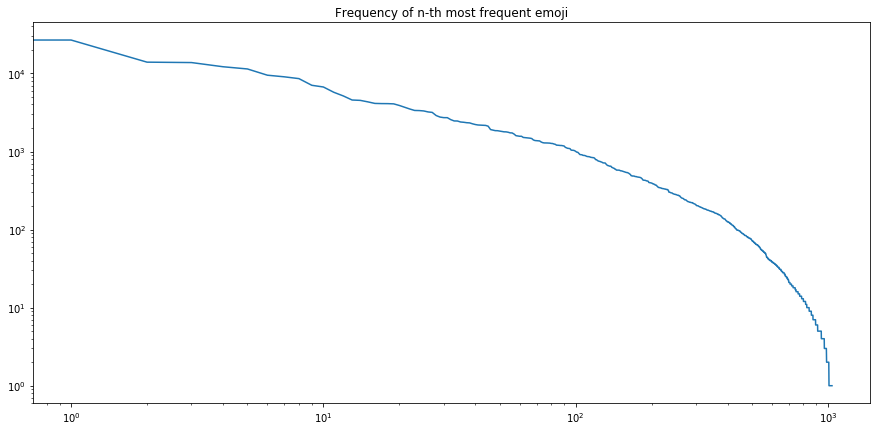

In [10]:
plt.rcParams['figure.figsize']=(15,7)
yscale('log'); xscale('log'); title('Frequency of n-th most frequent emoji')
plot([c for (w, c) in emoji_counter.most_common()])

In [11]:
eee = pd.DataFrame(emoji_counter.most_common(20))
eee.columns = ['Emoji', 'Amount']

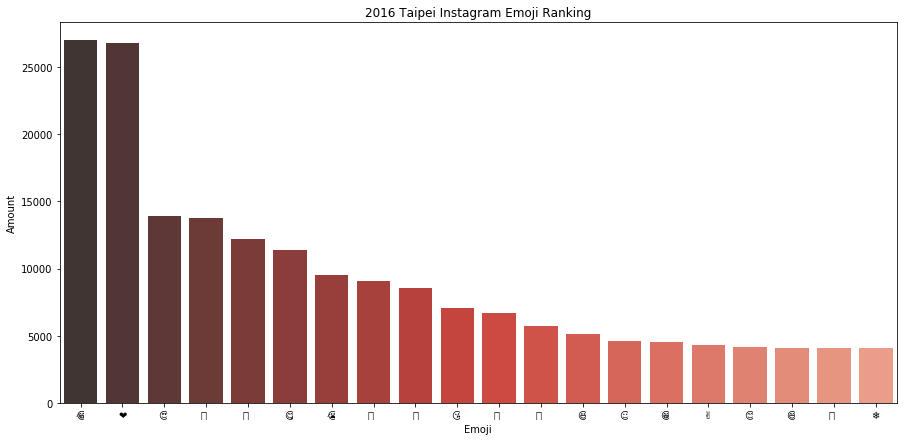

In [12]:
plt.rcParams['figure.figsize']=(15,7)
title('2016 Taipei Instagram Emoji Ranking')
sns.barplot(x='Emoji', y='Amount', data=eee, palette='Reds_d')